In [1]:
import numpy as np
import pandas as pd
import scipy as scipy
import math
import matplotlib.pyplot as plt
import random
import math
pd.options.display.mpl_style = 'default'
%matplotlib inline
from scipy import signal

In [2]:
def coef_of_var(data): return np.std(data)/np.mean(data)

## same data at different window sizes 1,2,4,8,16 unit long windows

In [20]:
data_at_scale_1 = np.random.randint(1000,size=2**10)
data_at_scale_2 = data_at_scale_1[::2]+data_at_scale_1[1::2]
data_at_scale_4 = data_at_scale_2[::2]+data_at_scale_2[1::2]
data_at_scale_8 = data_at_scale_4[::2]+data_at_scale_4[1::2]
data_at_scale_16 = data_at_scale_8[::2]+data_at_scale_8[1::2]

In [21]:
print len(data_at_scale_1)
print len(data_at_scale_2)
print len(data_at_scale_4)
print len(data_at_scale_8)
print len(data_at_scale_16)

1024
512
256
128
64


In [22]:
list_of_data = [data_at_scale_1,data_at_scale_2,data_at_scale_4,data_at_scale_8,data_at_scale_16]

## how sampling at different window sizes looks like

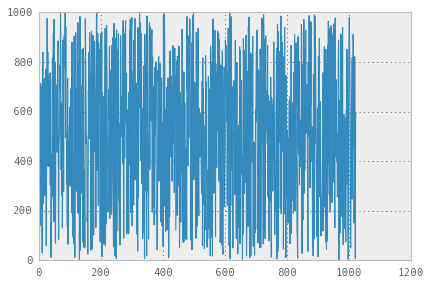

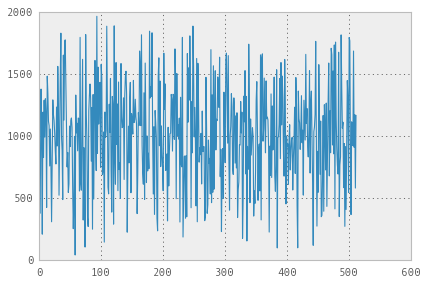

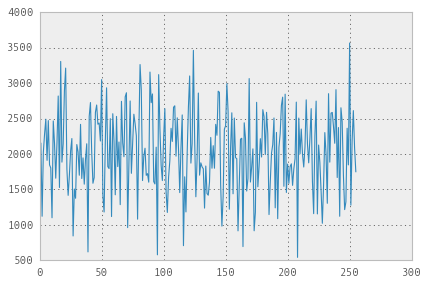

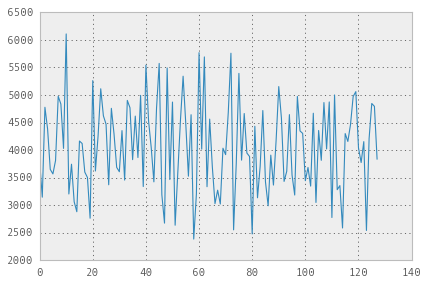

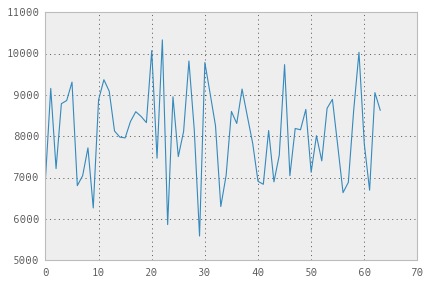

In [23]:
for data in list_of_data:
    plt.plot(data)
    plt.show()

## how actual coefficients of variation and expected coef.s of var. compare (expected if no larger scale variations are at play)

In [24]:
actual_coefs_of_var = [coef_of_var(i) for i in list_of_data]

In [25]:
actual_coefs_of_var

[0.56154813400380532,
 0.4021354736241719,
 0.28617173596365308,
 0.19998658627860055,
 0.13121782866926041]

In [26]:
expected_coefs_of_var = [coef_of_var(data_at_scale_1) /math.sqrt(2)**i for i in range(len(list_of_data))]

In [27]:
expected_coefs_of_var

[0.56154813400380532,
 0.39707449351674279,
 0.28077406700190261,
 0.19853724675837137,
 0.1403870335009513]

In [28]:
for i,data in enumerate(list_of_data):
    print 'scale: ', 2**i
    print 'stdev: ', np.std(data)
    print 'mean: ',np.mean(data)

scale:  1
stdev:  284.299646058
mean:  506.278320312
scale:  2
stdev:  407.184944249
mean:  1012.55664062
scale:  4
stdev:  579.530183218
mean:  2025.11328125
scale:  8
stdev:  809.990983889
mean:  4050.2265625
scale:  16
stdev:  1062.9238703
mean:  8100.453125


## red actual, blue expected

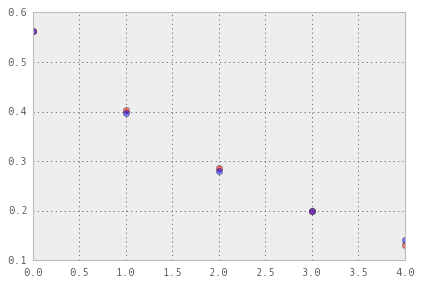

In [29]:
plt.plot(actual_coefs_of_var,'ro',alpha=0.5)
plt.plot(expected_coefs_of_var,'bo',alpha=0.5)
plt.show()

## now tweak the data, no longer uniform, add couple large scale gaussians stretching over the 1024 unit long genome window

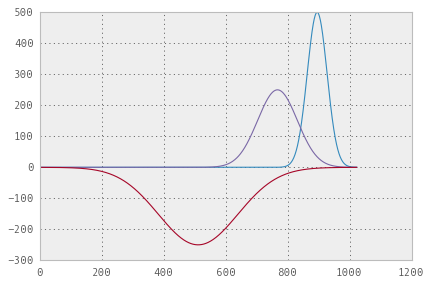

In [30]:
large_scale_signal_1 = [0]*(1024-256) + list(scipy.signal.gaussian(256,32)*500)
plt.plot(large_scale_signal_1)
large_scale_signal_2 = [0]*(1024-512) + list(scipy.signal.gaussian(512,64)*250)
plt.plot(large_scale_signal_2)
large_scale_signal_3 =  list(scipy.signal.gaussian(1024,128)*-250)
plt.plot(large_scale_signal_3)

## adding these signals changes data

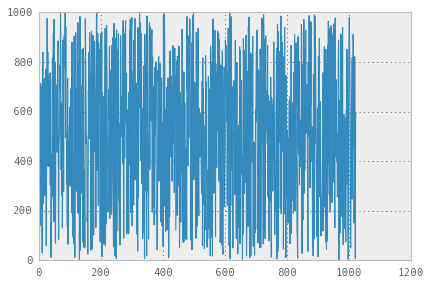

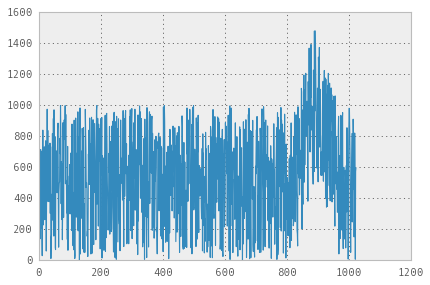

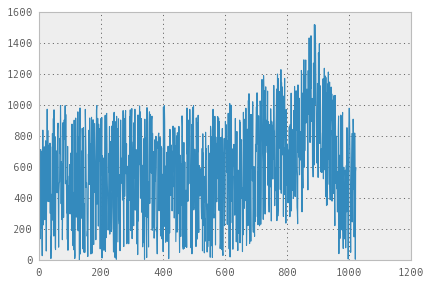

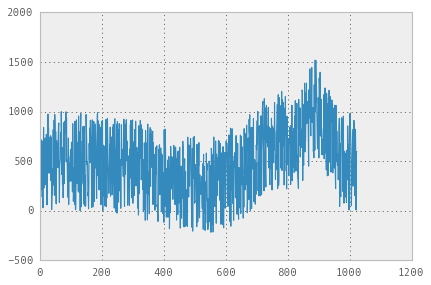

In [31]:
plt.plot(data_at_scale_1)
plt.show()
data_at_scale_1 = data_at_scale_1+ large_scale_signal_1
plt.plot(data_at_scale_1 ) 
plt.show()
data_at_scale_1 = data_at_scale_1 + large_scale_signal_2
plt.plot(data_at_scale_1 ) 
plt.show()
data_at_scale_1 = data_at_scale_1 + large_scale_signal_3
plt.plot(data_at_scale_1 ) 
plt.show()

## data on different sampling scales

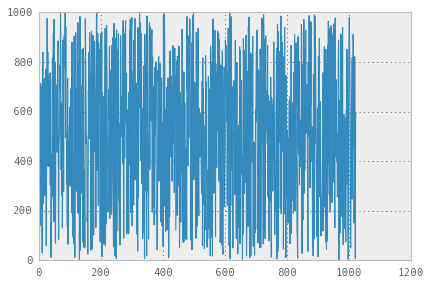

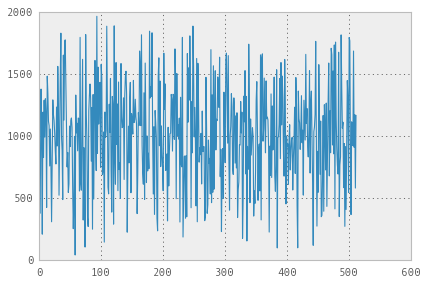

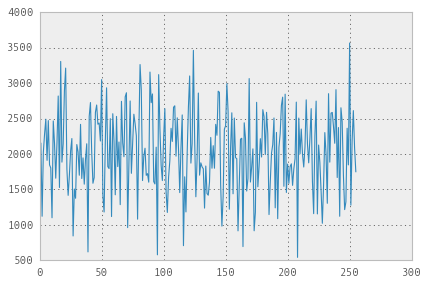

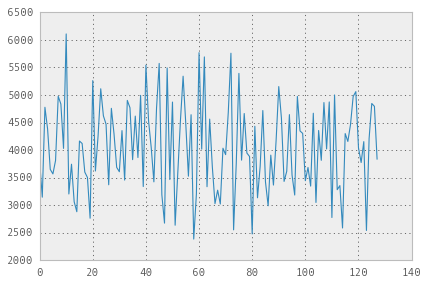

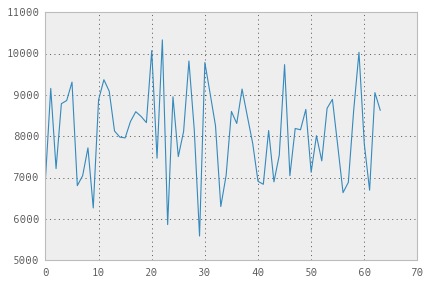

In [32]:
for data in list_of_data:
    plt.plot(data)
    plt.show()

## how do coefficients of variation compare now (red actual, blue expected)

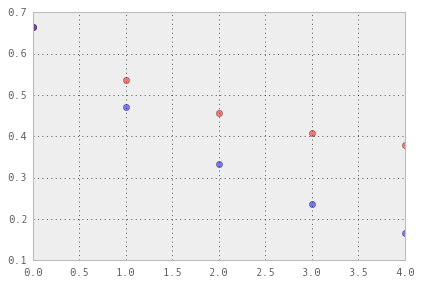

In [33]:
data_at_scale_2 = data_at_scale_1[::2]+data_at_scale_1[1::2]
data_at_scale_4 = data_at_scale_2[::2]+data_at_scale_2[1::2]
data_at_scale_8 = data_at_scale_4[::2]+data_at_scale_4[1::2]
data_at_scale_16 = data_at_scale_8[::2]+data_at_scale_8[1::2]

list_of_data = [data_at_scale_1,data_at_scale_2,data_at_scale_4,data_at_scale_8,data_at_scale_16]

actual_coefs_of_var = [coef_of_var(i) for i in list_of_data]

expected_coefs_of_var = [coef_of_var(data_at_scale_1) /math.sqrt(2)**i for i in range(len(list_of_data))]

plt.plot(actual_coefs_of_var,'ro',alpha=0.5)
plt.plot(expected_coefs_of_var,'bo',alpha=0.5)
plt.show()

## deviation from expected looks like in the preprint from yesterday

## pre perturbation stats

In [28]:
for i,data in enumerate(list_of_data):
    print 'scale: ', 2**i
    print 'stdev: ', np.std(data)
    print 'mean: ',np.mean(data)

scale:  1
stdev:  284.299646058
mean:  506.278320312
scale:  2
stdev:  407.184944249
mean:  1012.55664062
scale:  4
stdev:  579.530183218
mean:  2025.11328125
scale:  8
stdev:  809.990983889
mean:  4050.2265625
scale:  16
stdev:  1062.9238703
mean:  8100.453125


## post perturbation stats

In [35]:
for i,data in enumerate(list_of_data):
    print 'scale: ', 2**i
    print 'stdev: ', np.std(data)
    print 'mean: ',np.mean(data)

scale:  1
stdev:  336.773438247
mean:  506.278322231
scale:  2
stdev:  544.230881747
mean:  1012.55664446
scale:  4
stdev:  925.911876846
mean:  2025.11328893
scale:  8
stdev:  1655.46376856
mean:  4050.22657785
scale:  16
stdev:  3065.2601328
mean:  8100.4531557


## means are identical as expected, but variation increases with larger scales after adding the 3 gaussians